<a href="https://colab.research.google.com/github/guiebitt/cddeeplearning/blob/master/exercicio02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema

- Prever a lucratividade de um carrinho de sorvete a partir da temperatura

# Etapa 01: Importação das bibliotecas

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.5.0'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Etapa 02: Importação dos dados

In [4]:
sales_df = pd.read_csv('/SalesData.csv')
sales_df.reset_index(drop = True, inplace = True)
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [5]:
# Visualizar primeiros dados
sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [6]:
# Visualizar últimos dados
sales_df.tail(5)

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [7]:
# Resumo dos dados
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# Etapa 03: Visualização de Dados

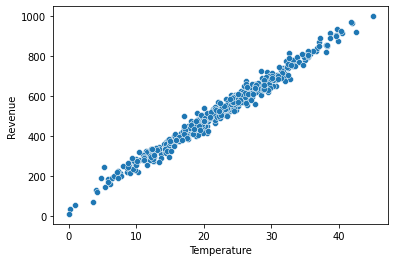

In [8]:
sns.scatterplot(x = sales_df['Temperature'], y = sales_df['Revenue'], );

# Etapa 04: Configuração da base de dados de treinamento

In [10]:
x_train = sales_df['Temperature']
y_train = sales_df['Revenue']

x_train.shape

(500,)

# Etapa 05: Construção do modelo

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=2, input_shape = [1]))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss="mean_squared_error")

In [ ]:
epochs_hist = model.fit(x_train, y_train, epochs=500)

In [14]:
epochs_hist.history.keys()

dict_keys(['loss'])

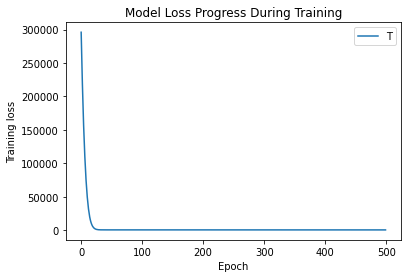

In [15]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend('Training loss')

In [16]:
model.get_weights()

[array([[21.505245, 21.50577 ]], dtype=float32),
 array([44.89009 , 44.871944], dtype=float32)]

In [18]:
temp = 33
profit = model.predict([temp])
profit

array([[754.5632, 754.5624]], dtype=float32)